## Решение прямой задачи в общем виде

Аномалии силы тяжести, вызванные притяжением тел известной формы, размера и избыточной плотности, рассчитывают на основе закона всемирного тяготения (закона Ньютона). Для этого гравитирующее тело разбивают на элементарные массы \\( dm \\); рассчитывают аномалию такой точечной массы \\( \Delta g_1 \\), которая равна вертикальной составляющей силы ньютоновского притяжения \\( F_1 \\) этой массой массы 1 г, находящейся в точке наблюдения \\( A \\), т. е. берут составляющую силы притяжения по направлению действия силы тяжести Земли \\( g \\); наконец, используя принцип суперпозиции, определяют аномалию за счет притяжения всем телом \\( \Delta g_T \\), как сумму притяжении всех элементарных точечных масс, которыми можно представить аномалообразующее тело.

Математически сказанное можно записать так. Согласно выражению \\( F_1 = G\frac{dm}{r^2}\\) , \\( \Delta g_1 = F_1 \cdot cos\alpha = G \cdot dm\frac{\bar z-z}{r^2} \\) ,где 
$$ cos\alpha = \frac{\bar z-z}{r}, r=\sqrt{(\bar x-x)^2+(\bar y-y)^2+(\bar{z}-z)^2} $$ - расстояние между точкой наблюдения \\(А (х, у, z)\\) и точкой \\(M( x,y,z )\\), в которой находится элементарная точечная масса. В природных условиях аномальные включения с плотностью \\(\sigma\\) находятся во вмещающей среде с плотностью \\(\sigma_0\\), поэтому под массой \\(dm\\) надо понимать избыточную массу \\(dm = (\sigma — \sigma_0) \space dV =\Delta\sigma \space dV\\), где \\(dV\\)—элементарный объем точечной массы; \\(\Delta\sigma\\) — избыточная плотность. Поэтому окончательные выражения для расчета аномалии силы тяжести точечной массы и тела, используемые в теории гравиразведки, имеют вид
$$\Delta g_1=G \cdot \Delta\sigma\frac{\bar z - z}{r^3} dV, \Delta g_T= \int_v \frac{\Delta\sigma(\bar z - z)dV}{[(\bar x-x)^2+(\bar y-y)^2+(\bar{z}-z)^2]^\frac{3}{2}}$$ Уравнение 1.1

Интеграл в последней формуле берут по всему объему тела \\(V\\). При \\(\sigma > \sigma_0 \space \Delta g_T\\) имеет положительный знак, т. е. наблюдаются увеличение притяжения и положительные аномалии. При \\(\sigma < \sigma_0 \space \Delta g_T\\) имеет отрицательный знак, т. е. наблюдаются уменьшение притяжения и отрицательные аномалии.



## Прямая задача для шара

Пусть однородный шар радиусом \\(R\\), объемом \\(V\\), с избыточной плотностью \\(\Delta\sigma\\) расположен на оси \\(Z\\) на глубине \\(h\\), а). Решим прямую задачу, т. е. определим гравитационный эффект вдоль наземного профиля \\(ОХ\\), проходящего через проекцию центра шара с началом координат над ним. Поскольку по закону всемирного тяготения шар притягивается с такой же силой, как точечная масса, сосредоточенная в его центре, аномалию над шаром Δgш можно получить без решения интеграла, считая, что аномалия силы тяжести над шаром и аномалия точечной массы, помещенной в его центре, совпадают:

$$\Delta g_ш = \Delta g_1 = G \cdot \Delta\sigma \cdot V\frac{h}{r^3} = \frac{GMh}{(x^2+h^2)^{3/2}}$$

где \\(M= Δσ V\\) —избыточная масса шара. График \\(\Delta g_ш\\) будет иметь максимум над центром шара \\(\Delta g_{max} = \frac{GM}{h^2}\\) (при х=0) и асимптотически стремиться к нулю при \\(х → ± ∞\\). Знак \\(\Delta g_ш\\) определяется знаком \\(\Delta\sigma\\). Формула для второй производной потенциала или горизонтального градиента силы тяжести получает вид:

$$W_{xz} = 	\frac{\partial(\Delta g_ш)}{\partial x} = GMh \cdot \frac{\partial (l/r^3)}{\partial x} = -\frac{3GMhx}{r^5} = -\frac{3GMhx}{(x^2+h^2)^{5/2}}$$

График \\(W_{XZ}\\) имеет перед шаром максимум \\((х<0)\\), а за шаром — минимум \\((x>0)\\).
Над центром шара \\(W_{XZ}=0\\). Если провести расчеты, например, \\(\Delta g_ш\\) по ряду профилей, то очевидно, что карта аномалий \\(\Delta g_ш\\) будет иметь вид концентрических окружностей с центром над шаром.

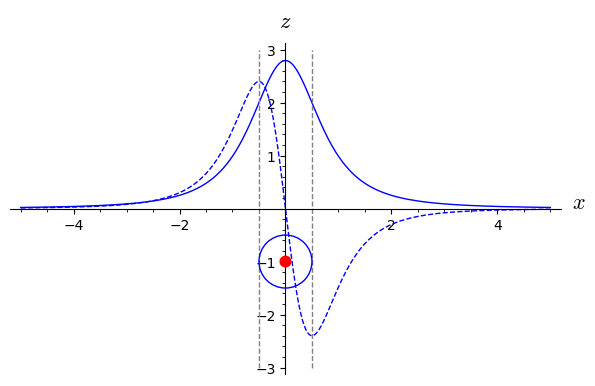

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sage
import numpy.linalg as linalg
from sage.plot.circle import Circle


def gBall(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.8
    M = p*(4/3)*np.pi*r**3
    h = 1
    return (G*M*h)/((x**2 + h**2)**(3/2))

def wBall(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.8
    M = p*(4/3)*np.pi*r**3
    h = 1
    return -(3*G*M*h*x)/((x**2 + h**2)**(5/2))

g1 = Graphics()
var('x y z')
g1+= plot(gBall(x),(x,-5,5))
g1+= plot(wBall(x),(x,-5,5),linestyle = "--")
g1+= circle((0,-1),0.5)
g1+= circle((0,-1),0.1,fill=True, color = 'red')
g1+= line([(0.5,-3),(0.5,3)],linestyle = "--", color = 'gray')
g1+= line([(-0.5,-3),(-0.5,3)],linestyle = "--", color = 'gray')
g1.axes_labels(['$x$','$z$'])
g1

## Прямая задача для горизонтального кругового цилиндра

Пусть горизонтальный бесконечно длинный круговой цилиндр радиуса \\(R\\), сечения \\(s\\), с избыточной плотностью \\(\Delta\sigma\\) расположен вдоль оси \\(Y\\) на глубине \\(h\\). Решим прямую задачу, т. е. определим \\(\Delta g_гц\\) и \\(W_{XZ}\\) вдоль оси \\(X\\), направленной вкрест простирания цилиндра с началом координат над его центром. Притяжение цилиндром будет таким же, как притяжение вещественной линии, расположенной вдоль его оси с массой единицы длины \\(dm = \pi R2\\) \\(\Delta\sigma dy\\). Поэтому для точек наблюдения вдоль оси \\(X (y=z=0)\\) с учетом, что \\(х=0\\), \\(-\infty< y < \infty \\)(цилиндр считается бесконечно длинным), \\(z=h\\), аналитическое выражение можно получить из уравнения 1.1:

$$\Delta g_гц = G\Delta\sigma R^2\int^{+\infty}_{-\infty}\frac{dy}{(x^2+y^2+h^2)^{3/2}} = \frac{2GM_1 h}{x^2+h^2}$$

где \\(M_1 = \pi R^2\Delta\sigma\\) — избыточная масса единицы длины цилиндра. График \\(\Delta g_{гц}\\) будет иметь максимум \\(\Delta g_{max} = \frac{2GM_1}{h}\\) (при \\(х=0\\) и, как и \\(\Delta g_ш\\), асимптотически стремиться к нулю при \\(х → ± \infty\\). Очевидно, что в плане изолинии \\(\Delta g_{гц}\\) будут представлять систему параллельных оси цилиндра линий. В целом график \\(\Delta g_{гц}\\) и \\(W_{XZ}\\) вдоль оси \\(X\\) будет примерно таким же, как и над шаром.

$$W_{xz} = 	\frac{\partial(\Delta g_{гц})}{\partial x} = -\frac{4GMhx}{(x^2+h^2)^2}$$

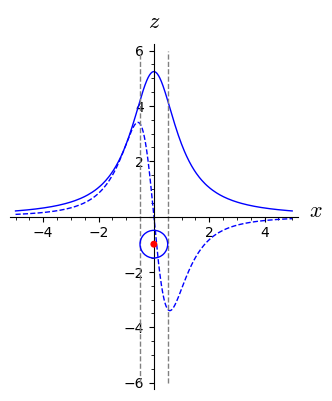

In [2]:
def gCylinder(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.5
    M = p*np.pi*r**2
    h = 1
    return (2*G*M*h)/((x**2 + h**2))

def wCylinder(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.5
    M = p*np.pi*r**2
    h = 1
    return -(4*G*M*h*x)/((x**2 + h**2)**(2))

g2 = Graphics()
var('x y z')

g2+= plot(gCylinder(x),(x,-5,5))
g2+= plot(wCylinder(x),(x,-5,5),linestyle = "--")
#g1+= plot(gBall(y),(y,-5,5))
g2+= circle((0,-1),0.5)
g2+= circle((0,-1),0.1,fill=True, color = 'red')
g2+= line([(0.5,-6),(0.5,6)],linestyle = "--", color = 'gray')
g2+= line([(-0.5,-6),(-0.5,6)],linestyle = "--", color = 'gray')
g2.axes_labels(['$x$','$z$'])
g2

## Прямая задача для вертикального уступа

Под вертикальным уступом в теории интерпретации гравитационных аномалий понимают горизонтальный полупласт (объемный пласт), ограниченный вертикальной гранью, бесконечного простирания по оси \\(Y\\). Плотность пород уступа и вмещающих пород различна и составляет постоянную и отличную от нуля величину \\(\Delta\sigma\\). Если глубину верхней горизонтальной плоскости, ограничивающей полупласт, обозначить \\(h1\\), нижней — \\(h2\\), а боковую вертикальную грань совместить с осью \\(Z\\), то гравитационное поле \\(g_у\\) в точках \\(x\\) (вдоль оси \\(Х\\) при \\(z=0\\) и \\(y=0\\)) соответствует выражению 1.1 при определенных пределах интегрирования:

$$\Delta g_у(x) = G\Delta\sigma\pi \int_{0}^{\infty} \int_{-\infty}^{+\infty} \int_{h_1}^{h_2} \frac{\bar zd \bar xd \bar yd \bar z}{[(\bar x - x)^2 + \bar y^2 + \bar z^2]^{3/2}} = G\Delta\sigma\{ \bar xln\frac{x^2+h_2^2}{x^2+h_1^2} + \pi(h_2-h_1) + 2h_2arctg\frac{x}{h_2} - 2h_1arctg\frac{x}{h_1} \}$$

При \\(х → ± \infty\\) значения \\(\Delta g\\) выходят на горизонтальные асимптоты с максимальной аномалией \\(\Delta g_{max} = 2\pi G\Delta\sigma\Delta h\\). Над самим вертикальным сбросом (при \\(х=0\\)) получаем \\(\Delta g = (1/2)\\) \\(\Delta g_{max} = \pi G \Delta\sigma\Delta h\\). Очевидно, на карте \\(\Delta g_у\\) будут наблюдаться параллельные изолинии с максимальным сгущением изолиний над вертикальной гранью.

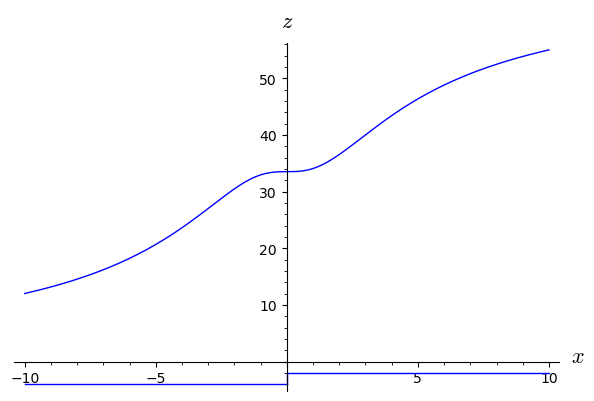

In [3]:
def gStep(x):
    G = 6.67#*10**(-11)
    p = 0.8
    x1 = 0
    h1 = 2
    h2 = 4
    return (G*p*(x1*np.log((x**2+h2**2)/(x**2+h1**2))+np.pi*(h2-h1)+2*h2*np.arctan(x/h2)-2*h1*np.arctan(x/h1)))

g3 = Graphics()
var('x y z')

g3+= plot(gStep(x),(x,-10,10))
#g2+= plot(wCylinder(x),(x,-5,5),linestyle = "--", color = 'grey')
#g1+= plot(gBall(y),(y,-5,5))
g3+= line([(0,-2), (10,-2)])
g3+= line([(0,-2), (0,-4)])
g3+= line([(0,-4), (-10,-4)])
#g3+= circle((0,-1),0.1,fill=True, color = 'red')
g3.axes_labels(['$x$','$z$'])
g3

Все графики увеличены для наглядности в \\(10^{11}\\) раз.

## Пояснения к коду

#### Ключевые слова: 

##### Класс - это объект, который обладает некоторыми полями и методами. 

##### Поля класса - объекты, которые хранят данные, которые в них помещены в ходе создания класса или при выполнении методов. 

##### Методы - "личные" функции класса, используются только конкретным классом. 

##### Перегрузка - множественная реализация функции, метода или оператора. В зависимости от того какого типа объект передается в функцию меняется логика функции. 

##### Оператор - ключевые символы, которым присвоена определенная функция (пример: \\(\_\_mul\_\_\\) - это знак умножения), которая используется для перегрузки.

##### Конструктор - функция \\(\_\_init\_\_\\) , вызывается при создание объекта, принимает данные для полей класса.

## Класс матрицы
Класс имеет 3 поля: \\(n\\) - количество строк, \\(m\\) - количество столбцов, \\(arr\\) - массив чисел;

Так же класс имеет 4 метода и 4 перегруженных оператора:

\\( \_\_mul\_\_\\) -  перегрузка оператора умножения "*", представляет собой перемножение матриц, или умножение матрицы на число.

\\( \_\_add\_\_\\) -  перегрузка оператора сложения "+", представляет собой сложение матриц.

\\( \_\_sub\_\_\\) -  перегрузка оператора вычитания "-", представляет собой вычитание матриц.

\\( \_\_invert\_\_\\) -  перегрузка оператора инвертирования "~", представляет собой взятие обратной матрицы.

\\( transpose\\) -  метод транспонирования матрицы. 

\\( mul\\) -  метод умножения матрицы на число. 

\\( my\_LU\\) -  метод делающий \\(LU\\) разложение. 

\\( LUinv\\) -  метод вычисляющий обратную матрицу, в начале алгоритма производится \\(LU\\) разложение, для того чтобы вычислить обратную матрицу нужно n раз решить СЛАУ: \\(LU A_i^{-1} = E_i\\), для каждого столбца обратной матрицы(\\(E_i\\) - столбец с одной единицей на i строке). Вычисления проходят в 3 этапа: 

1. Решается \\(LY_i = E_i\\), где \\(Y_i = UA_i^{-1}\\)
2. Решается \\(UA_i^{-1} = Y_i\\)
3. Собираются все столбцы \\(A_i^{-1}\\) в одну матрицу \\(A^{-1}\\)


In [4]:
class Matrix:           
    def __init__(self, arr):
        self.n = len(arr)
        self.m = len(arr[0])
        self.arr = arr
        
    def transpose(self): #Транспонирование
        lst = np.zeros((self.m,self.n))
        for i in np.arange(len(lst)):
            for j in np.arange(len(lst[0])):
                lst[i][j] = self.arr[j][i]
        return Matrix(lst)
    
    
    def my_LU(self,b): #LU разложение
        L  = np.zeros((self.n,self.n))
        U = np.copy(self.arr)
        
        for i in np.arange(self.n):
            for j in np.arange(i,self.n):
                L[j][i]=U[j][i]/U[i][i]
                
        for k in np.arange(1,self.n):
            for i in np.arange(k-1,self.n):
                for j in np.arange(i,self.n):
                    L[j][i]=U[j][i]/U[i][i]
                    
            for i in np.arange(k,self.n):
                for j in np.arange(k-1,self.n):
                    U[i][j]=U[i][j]-L[i][k-1]*U[k-1][j]        
        return Matrix(L),Matrix(U)      
    
    
    def LUinv(self): #Нахождение обратной матрицы
        A = Matrix(np.zeros((self.n,self.m)))
        #L = self.get_L()
        #U = self.get_U()
        L,U = self.my_LU(self.arr)
        for i in np.arange(self.n):
            Ei = Matrix(np.zeros((self.n, 1)))
            Ei.arr[i][0] = 1
            Yi = Matrix(linalg.solve(L.arr,Ei.arr))
            Ai = Matrix(linalg.solve(U.arr,Yi.arr))
            for j in np.arange(self.n):
                A.arr[j][i] = Ai.arr[j][0]
        return A
    
    def mul(self, a):
        arr = np.copy(self.arr)
        for i in np.arange(self.n):
            for j in np.arange(self.m):
                arr[i][j] = arr[i][j] * a
        return Matrix(arr)
                
    def __invert__(self):  #Нахождение обратной матрицы
        if self.n != self.m:
            print("INV: invalid size n != m")
            return Matrix(np.zeros((self.n,self.m)))
        if linalg.det(self.arr) == 0:
            print("INV: det = 0")
            #return Matrix(np.zeros((self.n,self.m)))
        return self.LUinv()
    
    def __mul__(self, other): #Умножение матрицы на матрицу или число
        if isinstance(other, int) or isinstance(other, sage.rings.integer.Integer):
            arr = np.copy(self.arr)
            for i in np.arange(self.n):
                for j in np.arange(self.m):
                    arr[i][j] = arr[i][j] * other
            return Matrix(arr)
        
        M = Matrix(np.zeros((self.n, other.m)))
        if self.m != other.n:
            print("MUL: invalid size m1 != n2", self.m, other.n)
            return M
        for i in np.arange(self.n):
            for j in np.arange(other.m):
                for r in np.arange(self.m):
                    M.arr[i][j] += self.arr[i][r]*other.arr[r][j]
                    #print(M.arr)
        return M        
    
    def __add__(self,other): #Сложение матриц
        M = Matrix(np.zeros((self.n, self.m)))
        if self.n != other.n:
            print("ADD: invalid size n1 != n2", self.n, other.n)
            return M
        if self.m != other.m:
            print("ADD: invalid size m1 != m2", self.m, other.m)
            return M
        for i in np.arange(self.n):
            for j in np.arange(self.m):
                M.arr[i][j] = self.arr[i][j] + other.arr[i][j]
        return M
    
    def __sub__(self,other): #
        M = Matrix(np.zeros((self.n, self.m)))
        if self.n != other.n:
            print("ADD: invalid size n1 != n2")
            return M
        if self.m != other.m:
            print("ADD: invalid size m1 != m2")
            return M
        for i in np.arange(self.n):
            for j in np.arange(self.m):
                M.arr[i][j] = self.arr[i][j] - other.arr[i][j]
        return M

## Обратная задача гравиразведки

Задано гравитационное поле в \\(N\\) точках по профилю с некоторым шагом, есть сеточная модель плотностей, состоящая из ячеек, размером \\(MN\\). Нужно найти плотности всех ячеек, получается система уравнений

\begin{cases}
    \Delta g_1 = \Delta g_{111}\sigma_{11} + \Delta g_{112}\sigma_{12} + \dots + \Delta g_{1jk}\sigma_{jk} + \dots + \Delta g_{1MN}\sigma_{MN}\\
    \Delta g_2 = \Delta g_{211}\sigma_{11} + \Delta g_{212}\sigma_{12} + \dots + \Delta g_{2jk}\sigma_{jk} + \dots + \Delta g_{2MN}\sigma_{MN}\\
    \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots\\
    \Delta g_i = \Delta g_{i11}\sigma_{11} + \Delta g_{i12}\sigma_{12} + \dots + \Delta g_{ijk}\sigma_{jk} + \dots + \Delta g_{iMN}\sigma_{MN}\\
    \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots\\
    \Delta g_N = \Delta g_{N11}\sigma_{11} + \Delta g_{N12}\sigma_{12} + \dots + \Delta g_{Njk}\sigma_{jk} + \dots + \Delta g_{NMN}\sigma_{MN}\\
\end{cases}

где, \\(\Delta g_i\\) - значение аномалии гравитационного поля в \\(i-ой\\) точке профиля;   
\\(\sigma_{jk}\\) - плотность \\(jk-й\\) ячейки;    
\\(\Delta g_{ijk}\\) - гравитационное поле \\(jk-й\\) ячейки с единичной плотностью в \\(i-й\\) точке профиля.

Аномалии гравитационного поля в каждой точке складываются из аномалий, создаваемых каждой ячейкой;    
СЛАУ для сеточной модели не доопределена и имеет бесконечное число решений т.к количество неизвестных больше чем количество уравнений.

$$\Delta g = G\sigma \left( (\xi - x) ln((\xi - x)^2 + (\zeta - z)^2) + 2(\zeta - z)arctg\frac{\xi -x}{\zeta -z}) \right)\Big|^{\xi_2 , \zeta_2}_{\xi_1 , \zeta_1}  $$

$$\Delta g_{ijk} = G\left( (\xi_{jk} - x_i) ln((\xi_{jk} - x_i)^2 + (\zeta_{jk} - z_i)^2) + 2(\zeta_{jk} - z_i)arctg\frac{\xi_{jk} -x_i}{\zeta_{jk} -z_i}) \right)\Big|^{\xi_{2jk} , \zeta_{2jk}}_{\xi_{1jk} , \zeta_{1jk}}  $$

СЛАУ можно записать в матричном виде: \\(\Delta g\\) - вектор столбец наблюденных аномалий силы тяжести, \\(A\\) - оператор прямой задачи, \\(\sigma\\) - вектор столбец плотностей.

$$ A\sigma = \Delta g$$


$$A = 
 \begin{pmatrix}
  \Delta g_{111} & \Delta g_{112} & \cdots & \Delta g_{1jk} & \cdots & \Delta g_{1NM}\\
  \Delta g_{211} & \Delta g_{212} & \cdots & \Delta g_{2jk} & \cdots & \Delta g_{2NM}\\
  \cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
  \Delta g_{i11} & \Delta g_{i12} & \cdots & \Delta g_{ijk} & \cdots & \Delta g_{iNM}\\
  \cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
  \Delta g_{N11} & \Delta g_{N12} & \cdots & \Delta g_{Njk} & \cdots & \Delta g_{NNM}
 \end{pmatrix}
$$

$$\sigma = 
 \begin{pmatrix}
  \sigma_{11}\\
  \sigma_{12}\\
  \cdots \\
  \sigma_{21}\\
  \sigma_{22}\\
  \cdots \\
  \sigma_{ij}\\
  \cdots \\
  \sigma_{MN}
 \end{pmatrix}
$$

$$\Delta g = 
 \begin{pmatrix}
  \Delta g_{1}\\
  \Delta g_{2}\\
  \cdots \\
  \Delta g_{i}\\
  \cdots \\
  \Delta g_{N}
 \end{pmatrix}
$$

Матрица \\(A\\) не квадратная, 

обратная задача решается путем минимизации функционала невязки \\(L\\), 

минимум функционала - градиент равен нулю.
$$ L = ||A\sigma -\Delta g||^2 \to min$$
$$ \nabla L = 2A^T(A\sigma - \Delta g) = 0 $$
$$ \sigma = (A^T A)^{-1}A^T \Delta g $$

## Класс модели

Класс имеет 6 полей: \\(n\\) - количество строк, \\(m\\) - количество столбцов, 

\\(A\\) - матрица гравитационного влияния единичных ячеек на точку, 

\\(deltaG\\) - измеренные данные (то что известно), которые генерируется случайно, представляются в столбце, 

\\(sigma\\) - сетка плотностей (то что находится), которая представлена столбце, 

\\(newDeltaG\\) - рассчитанные данные для сравнения результата расчетов плотностей.

Так же класс имеет 3 метода:

\\(CreateA\\) - метод создания матрицы \\(A\\).

\\(CalcSigma\\) - метод расчета столбца \\(sigma\\).

\\(Line\\) - вспомогательный метод, нужный для перевода столбцов в строки, необходимо для построения графиков.

#### Описание работы класса

Конструктор \\(\_\_init\_\_\\) принимает 3 значения, количество столбцов, количество строк, и измеренные данные.
Поля класса \\(A\\) и \\(sigma\\) считаются методами \\(CreateA\\) и \\(CalcSigma\\), соответственоо. 


In [5]:
global G
G = 6.67*10**(-11)

class SLAE:
    def __init__(self, n, m, deltaG):
        self.n = n
        self.m = m
        self.A = Matrix(self.CreateA())
        self.deltaG =  Matrix(deltaG)
        self.sigma = self.CalcSigma()
        self.newDeltaG = self.A * self.sigma
    
    # Подсчет матрицы A
    def CreateA(self):
        A = np.zeros((self.m, self.n*self.m))
        for k in np.arange(self.m):
            xi = k
            zi = 1
            for z in np.arange(self.n):
                for x in np.arange(self.m):
                    r = sqrt((zi+z)**2+(x-xi)**2)
                    A[k][x+((z-1)*self.m)] = G*((zi+z)/(r**3))
        return A
    
    # Подсчет плотности
    def CalcSigma(self):
        return ((~(self.A.transpose() * self.A)) * self.A.transpose()) * self.deltaG 
    
    def Line(self, row):
        line = np.zeros(len(row.arr))
        for i in np.arange(len(row.arr)):
            line[i] = row.arr[i][0]
        return line

INV: det = 0
DELTA G: 
 [0.1015829  0.63707237 0.59218059 0.39445799 0.14757691 0.5896971
 0.53929471 0.8150787  0.95475385 0.36954232 0.71485582 0.75586697
 0.46916395 0.86302178 0.86605372 0.13243512 0.50730026 0.41828837
 0.84246202 0.15493651 0.34312874 0.00538307 0.94460553 0.38872971
 0.22597781 0.76200096 0.83618068 0.95581835 0.99508017 0.50868694
 0.58039148 0.52082988 0.29336451 0.47765507 0.33196751 0.57874317
 0.41415564 0.46648539 0.82217434 0.74358516 0.44160123 0.12807436
 0.12678164 0.03596071 0.58913679 0.02251677 0.98006127 0.0703287
 0.88479987 0.5958632 ]
CALCULATED DELTA G: 
 [0.1015829  0.63707237 0.59218059 0.39445799 0.14757691 0.5896971
 0.53929471 0.8150787  0.95475385 0.36954232 0.71485582 0.75586697
 0.46916395 0.86302178 0.86605372 0.13243512 0.50730026 0.41828837
 0.84246202 0.15493651 0.34312874 0.00538307 0.94460553 0.38872971
 0.22597781 0.76200096 0.83618068 0.95581835 0.99508017 0.50868694
 0.58039148 0.52082988 0.29336451 0.47765507 0.33196751 0.5787

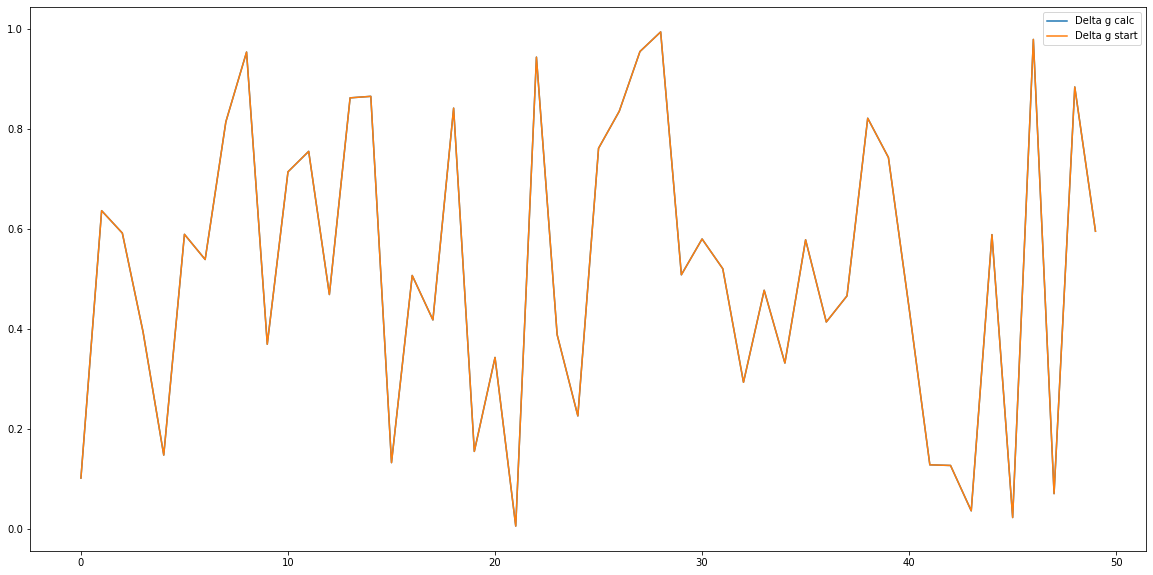

In [6]:
n = 1 #количество строк
m = 50 #количество столбцов
s = SLAE(n,m,np.random.rand(m,1)) #создание объекта класса SLAE

# Вывод матриц

#print("A: \n",s.A.arr)
#print("A * AT: \n", (s.A.transpose() * s.A).arr)
#print("INVERSE: \n",(~(s.A.transpose() * s.A)).arr)
#print("SIGMA: \n",s.Line(s.sigma))
print("DELTA G: \n", s.Line(s.deltaG))
print("CALCULATED DELTA G: \n", s.Line(s.newDeltaG))
#print("L true: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.deltaG)).arr)
#print("L false: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.newDeltaG)).arr)

# Вывод графиков

plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m),s.Line(s.newDeltaG))
p2, = plt.plot(np.arange(s.m),s.Line(s.deltaG))
plt.legend([p1,p2],['Delta g calc','Delta g start'])
plt.show()

Графики налегают друг на друга, поэтому не видно 2.

## Проблемы обратной матрицы и LU разложения

Из-за того как хранятся данные, существует погрешность при нахождении обратной матрицы, в следствии решение является (очень)не точным и не устойчивым, при квадратной модели.

Так же так как при нахождении обратной матрицы используется \\(LU\\) разложение, временная сложность алгоритма равна \\(O(n^3)\\), что очень медленно.

Приемлемый результат получается при нахождении плотности 1 линии, что показано на графике выше. На графике ниже показан пример вычислений для плотностной модели с 2 линиями.


INV: det = 0


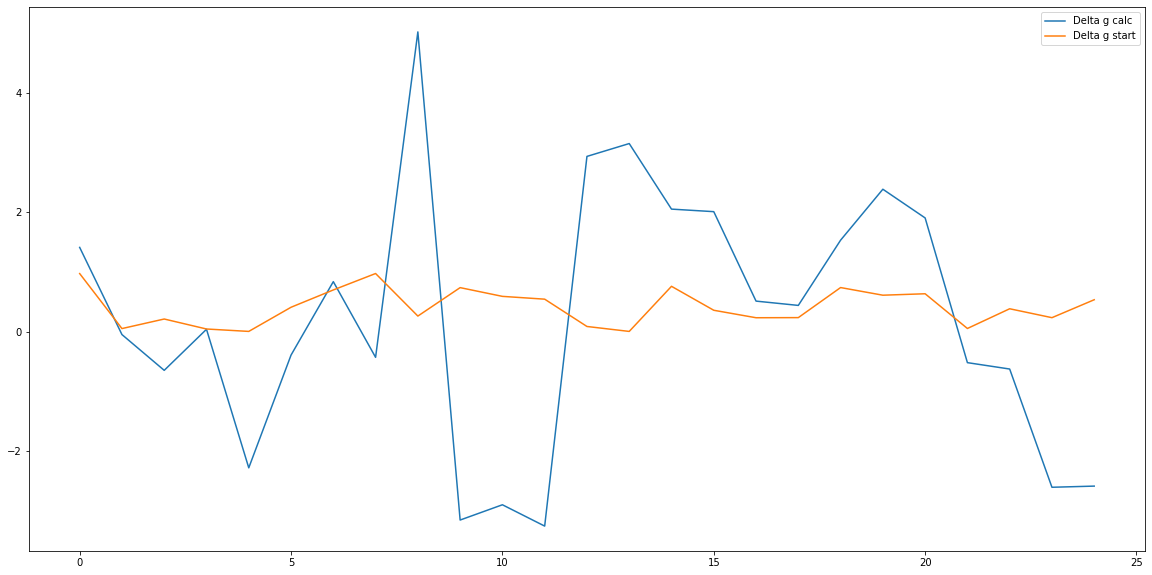

In [7]:
n = 2 #количество строк
m = 25 #количество столбцов
s = SLAE(n,m,np.random.rand(m,1)) #создание объекта класса SLAE

#print("A: \n",s.A.arr)
#print("A * AT: \n", (s.A.transpose() * s.A).arr)
#print("INVERSE: \n",(~(s.A.transpose() * s.A)).arr)
#print("SIGMA: \n",s.Line(s.sigma))
#print("DELTA G: \n", s.Line(s.deltaG))
#print("CALCULATED DELTA G: \n", s.Line(s.newDeltaG))
#print("L true: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.deltaG)).arr)
#print("L false: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.newDeltaG)).arr)

plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m),s.Line(s.newDeltaG))
p2, = plt.plot(np.arange(s.m),s.Line(s.deltaG))
plt.legend([p1,p2],['Delta g calc','Delta g start'])
plt.show()

## Метод градиентного спуска

Метод градиентного спуска - численный метод нахождения локального экстремума функции. Данный метод итерационный, то есть модель подбирается пошагово.

Градиент функционала - вектор, направленный в сторону наискорейшего возрастания функции.

На каждой итерации рассчитывается градиент функционала невязки для текущего приближения модели:

$$ \nabla L_i = 2A^T(A\sigma_i - \Delta g) + 2c(\sigma_i - \sigma_A)$$

, где \\(c\\) - параметр регуляризации, \\(\sigma_A\\) - априорные данные.

Модель смещается в сторону антиградиента, то есть противоположно направлению возрастания невязки:

$$ \sigma_{i+1} = \sigma_i - \alpha\nabla L_i$$

, где \\(\alpha\\) - масштабный коэффициент(величина шага).


## Класс модели основанной на методе градиентного спуска

Класс имеет 7 полей: \\(n\\) - количество строк, \\(m\\) - количество столбцов, 

\\(iteration\\) - количество итераций.

\\(A\\) - матрица гравитационного влияния единичных ячеек на точку, 

\\(deltaG\\) - измеренные данные (то что известно), которые генерируется случайно, представляются в столбце, 

\\(sigma\\) - сетка плотностей (то что находится), которая представлена столбце, 

\\(newDeltaG\\) - рассчитанные данные для сравнения результата расчетов плотностей.

Так же класс имеет 3 метода:

\\(CreateA\\) - метод создания матрицы \\(A\\).

\\(CalcSigma\\) - метод расчета столбца \\(sigma\\).

\\(gradient\\) - метод нахождения градиента функционала невязки.

\\(Line\\) - вспомогательный метод, нужный для перевода столбцов в строки, необходимо для построения графиков.

#### Описание работы класса

Конструктор \\(\_\_init\_\_\\) принимает 4 значения, количество столбцов, количество строк, измеренные данные и количество итераций.
Поля класса \\(A\\) и \\(sigma\\) считаются методами \\(CreateA\\) и \\(CalcSigma\\), соответственоо.

In [8]:
class GRAD:
    def __init__(self, n, m, deltaG, iteration):
        self.n = n
        self.m = m
        self.iteration = iteration
        self.A = Matrix(self.CreateA())
        self.deltaG =  Matrix(deltaG)
        self.sigma = self.CalcSigma()
        self.newDeltaG = self.A * self.sigma
    
    # Подсчет матрицы А
    def CreateA(self):
        A = np.zeros((self.m, self.n*self.m))
        for k in np.arange(self.m):
            xi = k
            zi = 1
            for z in np.arange(self.n):
                for x in np.arange(self.m):
                    r = sqrt((zi+z)**2+(x-xi)**2)
                    A[k][x+((z-1)*self.m)] = G*((zi+z)/(r**3))
        return A
    
    #Подсчет градиента невязки на i шаге
    def Gradient(self, sigma):
        return ((self.A * 2).transpose()) * ((self.A * sigma) - self.deltaG)
    
    # Подсчет плотности
    def CalcSigma(self):
        sigma  = Matrix(np.zeros((self.m*self.n, 1)))
        a = 3*10**(19) + 2*10**(18)# + 0.001
        for i in np.arange(self.iteration):
            sigma =  sigma - (self.Gradient(sigma) * a)
            
        return sigma
    
    def Line(self, row):
        line = np.zeros(len(row.arr))
        for i in np.arange(len(row.arr)):
            line[i] = row.arr[i][0]
        return line

In [9]:
import random

n = 10 #количество строк
m = 10 #количество столбцов
it = 20 #количество итераций для 1 приближения
it2 = 5 #количество итераций для 2 приближения
#it3 = 10
deltaG = np.random.rand(m,1)# генирация измеренных данных
noiseG =  np.zeros((m, 1))

for i in np.arange(m):
    noiseG[i] = deltaG[i] - 0.05 + random.random()/10

s = GRAD(n,m,deltaG,it) #создание объекта класса GRAD 1 приближения
s2 = GRAD(n,m,noiseG,it)#создание объекта класса GRAD с шумом
s3 = GRAD(n,m,deltaG,it2) #создание объекта класса GRAD 2 приближения

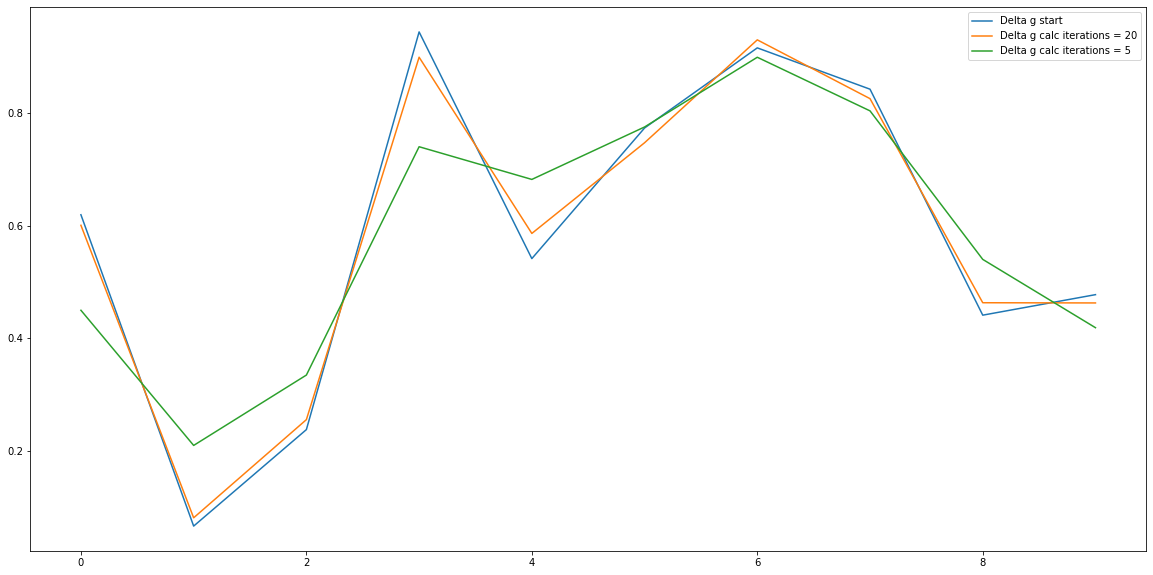

In [10]:
#print("A: \n",s.A.arr)
#print("A * AT: \n", (s.A.transpose() * s.A).arr)
#print("INVERSE: \n",(~(s.A.transpose() * s.A)).arr)
#print("DELTA G: \n", s.Line(s.deltaG))
#print("NOISE G: \n", s2.Line(s2.deltaG))
#print("CALCULATED DELTA G: \n", s.Line(s.newDeltaG))
#print("SIGMA: \n",s.Line(s.sigma))
#print("SIGMA: \n",s2.Line(s2.sigma))
#print("L true: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.deltaG)).arr)
#print("L false: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.newDeltaG)).arr)

#вывод графиков

plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m),s.Line(s.deltaG))
p2, = plt.plot(np.arange(s.m),s.Line(s.newDeltaG))
p3, = plt.plot(np.arange(s3.m),s.Line(s3.newDeltaG))
#p4, = plt.plot(np.arange(s3.m),s.Line(s3.newDeltaG))
plt.legend([p1,p2,p3],['Delta g start', 'Delta g calc iterations = 20', 'Delta g calc iterations = 5'])
plt.show()

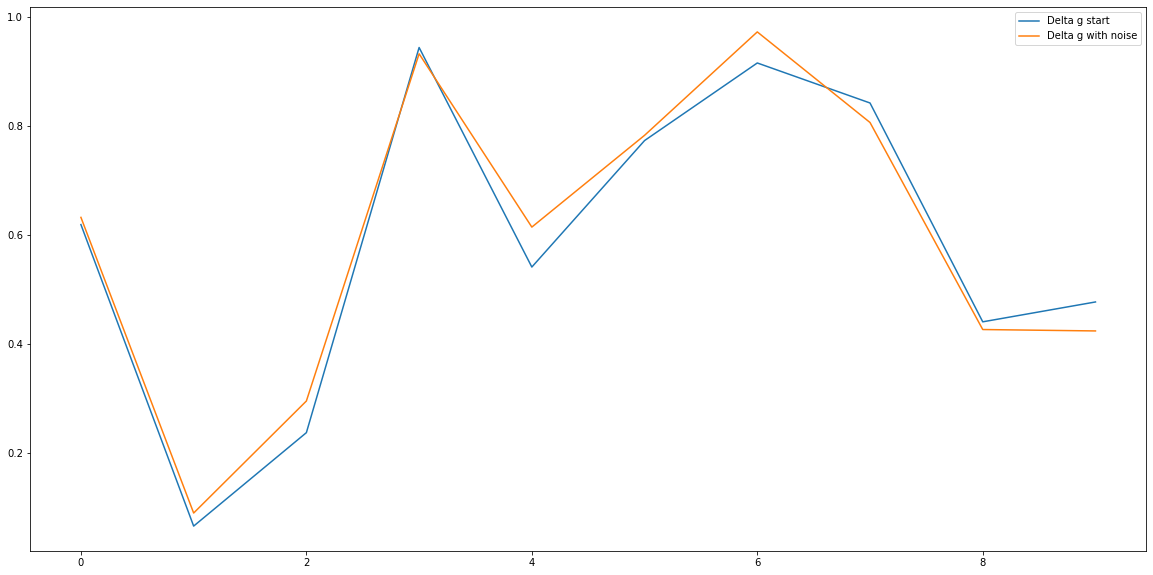

In [11]:
plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m),s.Line(s.deltaG))
p2, = plt.plot(np.arange(s2.m),s.Line(s2.newDeltaG))
plt.legend([p1,p2],['Delta g start', 'Delta g with noise'])
plt.show()

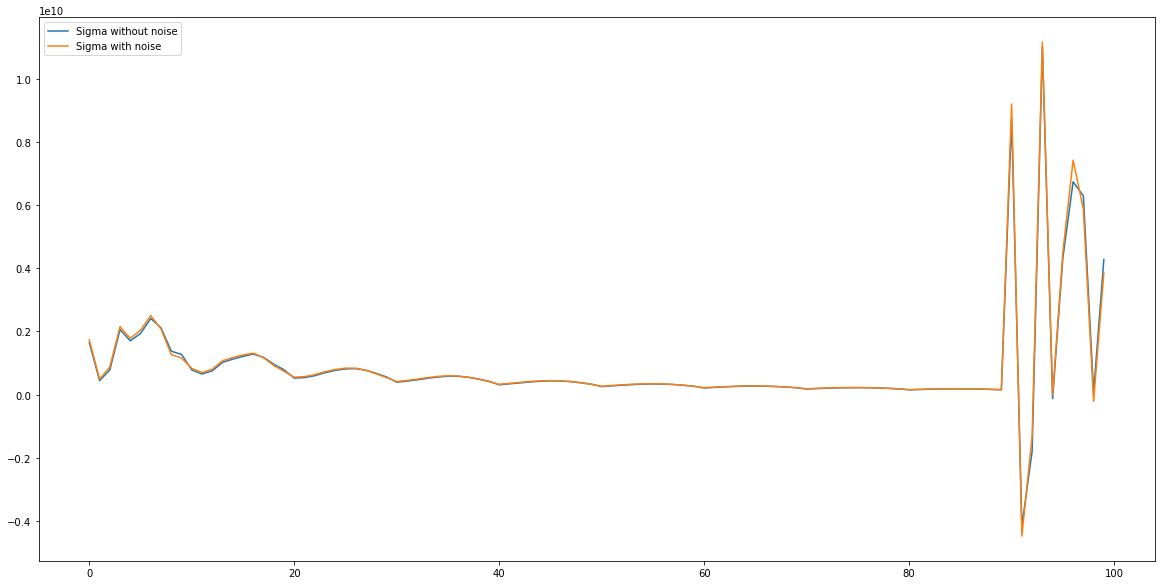

In [12]:
plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m * s.n),s.Line(s.sigma))
p2, = plt.plot(np.arange(s2.m * s2.n),s.Line(s2.sigma))
plt.legend([p1,p2],['Sigma without noise', 'Sigma with noise'])
plt.show()

## Преимущества метода градиентного спуска

Для вычисления плотности не нужно считать обратную матрицу, в следствии чего алгоритм работает быстрее и точнее.

Алгоритм является более устойчивым за счет использования априорных данных и параметра регуляции.

Точность модели зависит от количества итераций, что дает выбор между скоростью и точностью.

Примерна сложность алгоритма \\(O(i*n^2)\\), где \\(i\\) количество итераций, но бесконечно увеличивать \\(i\\) не имеет смысла так как при \\(i = 100\\), точность будет до одной тысячной (при данном параметре \\(\alpha\\), правильно подобрав параметр можно добиться большей точности при меньшем количестве итераций). Так что \\(i\\) можно считать константой, что дает временную сложность алгоритма \\(O(n^2)\\)